Introduction
 . Purpose
 . Dataset

A First Look At The Dataset
 . Importing libraries and reading the dataset
 . Correlation between all columns

Data visulizations To Understand The Dataset

Supervised Machine Learning Algorithms
  . preparing data for regression
  . Decision tree
  . Neural Networks
  . Boosting
  . Support Vector Machines
  . k-nearest neighbors

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

df=pd.read_csv('graduate-admissions/Admission_Predict.CSV',sep=",")

In [9]:
print("There are",len(df.columns),"columns.")

There are 9 columns.


In [11]:
for x in df.columns:
    print(str(x)+", ")

Serial No., 
GRE Score, 
TOEFL Score, 
University Rating, 
SOP, 
LOR , 
CGPA, 
Research, 
Chance of Admit , 


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [13]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


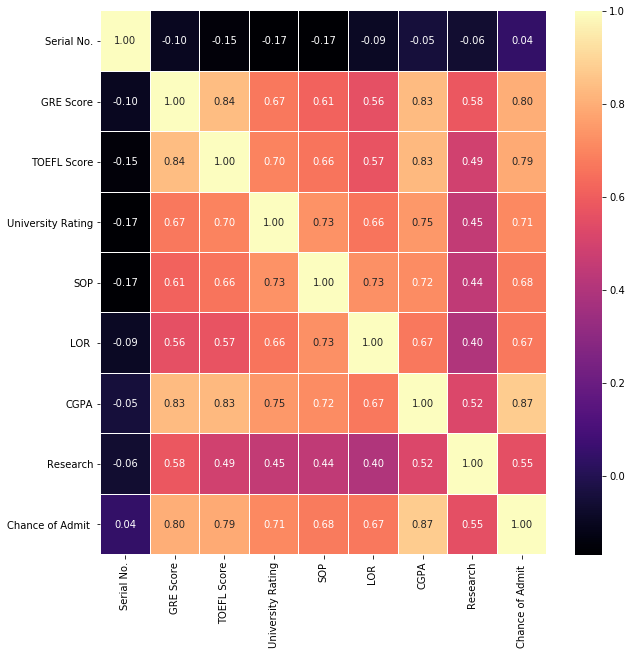

In [14]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()

Not Having Research: 181
Having Research: 219


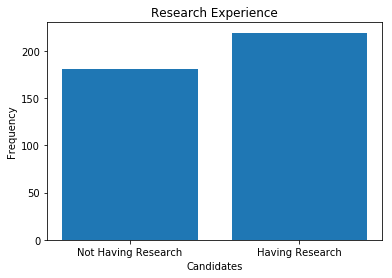

In [16]:
print("Not Having Research:",len(df[df.Research==0]))
print("Having Research:",len(df[df.Research==1]))
y=np.array([len(df[df.Research==0]),len(df[df.Research==1])])
x=["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'TOEFL Score')

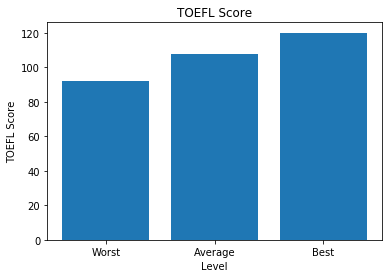

In [17]:
y=np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x=["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Score")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

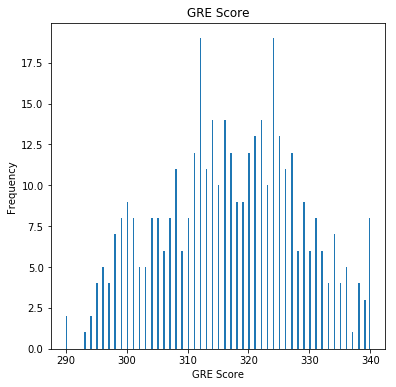

In [18]:
df["GRE Score"].plot(kind='hist',bins=200,figsize=(6,6))
plt.title("GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

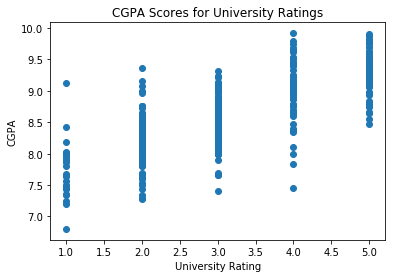

In [21]:
plt.scatter(df["University Rating"],df.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

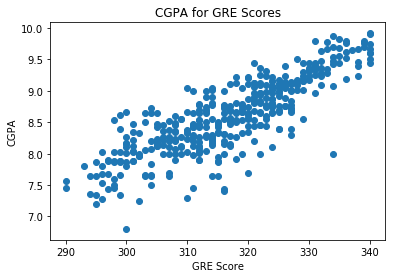

In [22]:
plt.scatter(df["GRE Score"],df["CGPA"])
plt.title("CGPA for GRE Scores")
plt.ylabel("CGPA")
plt.xlabel("GRE Score")
plt.show()

In [27]:
df=df.rename(columns={'Chance of Admit ':'Chance of Admit'})

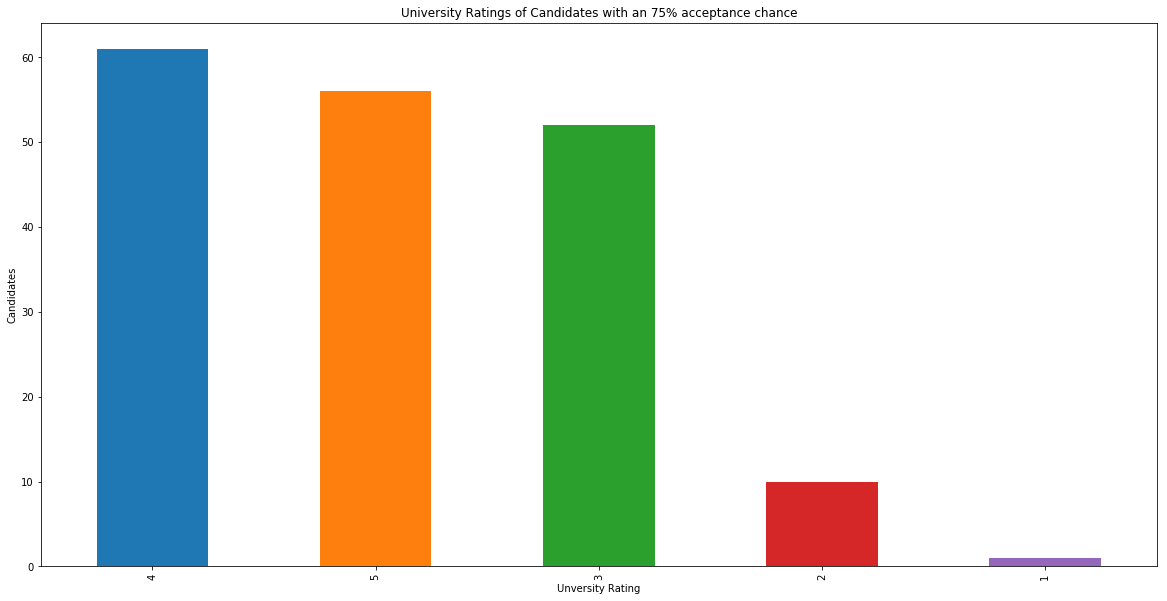

In [28]:
s=df[df["Chance of Admit"]>=0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20,10))
plt.xlabel("Unversity Rating")
plt.ylabel("Candidates")
plt.show()

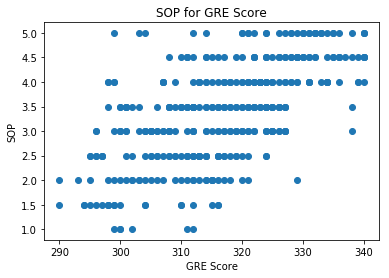

In [30]:
plt.scatter(df["GRE Score"],df["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

Preparing Data for Classification
If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.
If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.

In [34]:
df.drop(["Serial No."],axis=1,inplace=True)

In [35]:
print("There are",len(df.columns),"columns.")

There are 8 columns.


In [163]:
y=df["Chance of Admit"].values
x=df.drop(["Chance of Admit"],axis=1)

In [164]:
#seperating train (80%) and test (20%)sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [135]:
print("X_train_shape:", x_train.shape, " y_train_shape:", y_train.shape)
print("X_test_shape:", x_test.shape,"  y_test_shape:", y_test.shape)

X_train_shape: (320, 7)  y_train_shape: (320,)
X_test_shape: (80, 7)   y_test_shape: (80,)


In [165]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scalerX=MinMaxScaler(feature_range=(0,1))
x_train[x_train.columns]=scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=scalerX.transform(x_test[x_test.columns])

y_train_01=[1 if each>0.8 else 0 for each in y_train]
y_test_01 =[1 if each>0.8 else 0 for each in y_test]

#list to array
y_train_01=np.array(y_train_01)
y_test_01 =np.array(y_test_01)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/ipykernel_lau

In [166]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train_01)
print("train score:", clf.score(x_train, y_train_01))
print("test score:", clf.score(x_test, y_test_01))

train score: 1.0
test score: 0.95


In [167]:
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(x_train, y_train_01)
    return(clf.score(x_train, y_train_01), clf.score(x_test, y_test_01))

In [177]:
depths = np.arange(1,10)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
te_scores = [s[1] for s in scores]

# 找出交叉验证数据集评分最高的索引
tr_best_index = np.argmax(tr_scores)
te_best_index = np.argmax(te_scores)

print("bestdepth:", te_best_index+1, " bestdepth_score:", te_scores[te_best_index], '\n')


bestdepth: 1  bestdepth_score: 0.95 



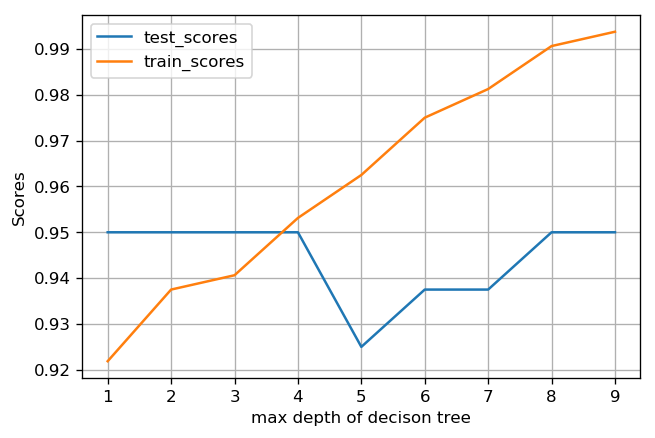

In [176]:
depths = np.arange(1,10)
plt.figure(figsize=(6,4), dpi=120)
plt.grid()
plt.xlabel('max depth of decison tree')
plt.ylabel('Scores')
plt.plot(depths, te_scores, label='test_scores')
plt.plot(depths, tr_scores, label='train_scores')
plt.legend()

bestmin: 0.00202020202020202
bestscore: 0.9625


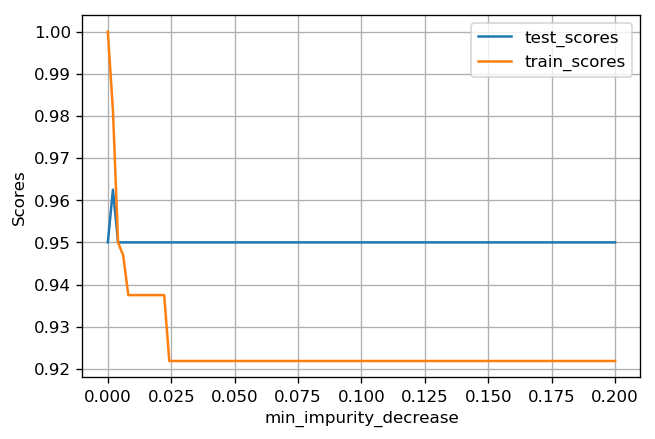

In [173]:
def minsplit_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)
    clf.fit(x_train, y_train_01)
    return (clf.score(x_train, y_train_01), clf.score(x_test, y_test_01), )

# 指定参数范围，分别训练模型并计算得分

vals = np.linspace(0, 0.2, 100)
scores = [minsplit_score(v) for v in vals]
tr_scores = [s[0] for s in scores]
te_scores = [s[1] for s in scores]

bestmin_index = np.argmax(te_scores)
bestscore = te_scores[bestmin_index]
print("bestmin:", vals[bestmin_index])
print("bestscore:", bestscore)

plt.figure(figsize=(6,4), dpi=120)
plt.grid()
plt.xlabel("min_impurity_decrease")
plt.ylabel("Scores")
plt.plot(vals, te_scores, label='test_scores')
plt.plot(vals, tr_scores, label='train_scores')

plt.legend()

值此为我们找到了两个参数,最佳深度depth=4 和最佳min_impurity_decrease=0.002，下面我来用两个参数简历模型进行测试：

In [151]:
from sklearn import metrics 

model = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.002)
model.fit(x_train, y_train_01)

print("tees_score:", model.score(x_test, y_test_01))

y_pred = model.predict(x_test)

print("prescision_score:",metrics.precision_score(y_test_01, y_pred))
print("recall_score:",metrics.recall_score(y_test_01, y_pred))
print("F1_score:",metrics.f1_score(y_test_01, y_pred))

tees_score: 0.95
prescision_score: 0.9629629629629629
recall_score: 0.896551724137931
F1_score: 0.9285714285714286


Super Vector Machine

In [169]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train_01)
print("score: ", svm.score(x_test,y_test_01))


score:  0.9


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


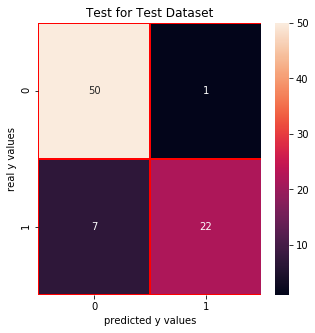

In [170]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test_01,svm.predict(x_test))

#cm visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm,annot=True, linewidths=0.5,linecolor="red",fmt='.0f',ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [171]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ",precision_score(y_test_01,svm.predict(x_test)))
print("recall_score: ",recall_score(y_test_01,svm.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,svm.predict(x_test)))


precision_score:  0.9565217391304348
recall_score:  0.7586206896551724
f1_score:  0.8461538461538461


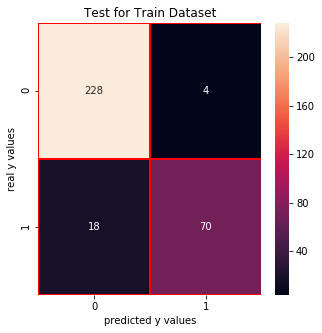

In [172]:
cm_svm_train = confusion_matrix(y_train_01,svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

In [ ]:
K-nearest neighbors

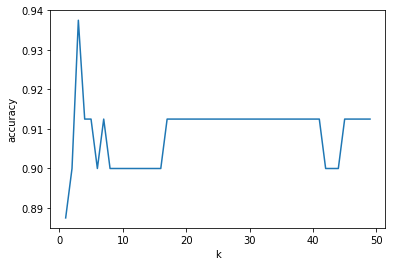

score of 3 : 0.9375
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 1 -> the predict: [1]


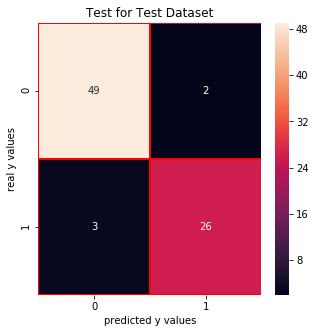

precision_score:  0.9285714285714286
recall_score:  0.896551724137931
f1_score:  0.912280701754386


In [180]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train_01)
print("score of 3 :",knn.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(knn.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(knn.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01,knn.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,knn.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,knn.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,knn.predict(x_test)))

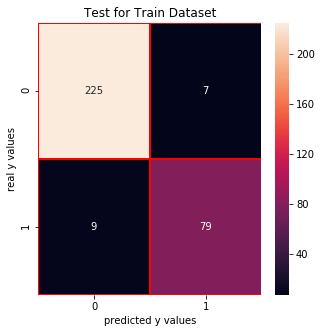

In [181]:
#test for train dataset
cm_knn_train = confusion_matrix(y_train_01,knn.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()